In [50]:
import pathlib
import PIL
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root='E:\Ali\Machine Learning\Datasets\Image Datasets'
fnames=os.listdir(root)

In [3]:
data_dir=os.path.join(root,fnames[0])

In [4]:
data_dir

'E:\\Ali\\Machine Learning\\Datasets\\Image Datasets\\Alzheimer_s Dataset'

In [5]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset')

In [6]:
list(data_dir.glob('*/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (19).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (20).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (21).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (22).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (23).jpg')]

In [7]:
len(list(data_dir.glob('*/*')))

6400

In [8]:
list(data_dir.glob('MildDemented/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (19).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (20).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (21).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (22).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/MildDemented/26 (23).jpg')]

In [9]:
list(data_dir.glob('ModerateDemented/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/ModerateDemented/27 (2).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/ModerateDemented/27.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/ModerateDemented/28 (2).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/ModerateDemented/28.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/ModerateDemented/29 (2).jpg')]

In [10]:
list(data_dir.glob('NonDemented/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (100).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (62).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (63).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (64).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (65).jpg')]

In [11]:
list(data_dir.glob('VeryMildDemented/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/VeryMildDemented/26 (44).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/VeryMildDemented/26 (45).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/VeryMildDemented/26 (46).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/VeryMildDemented/26 (47).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/VeryMildDemented/26 (48).jpg')]

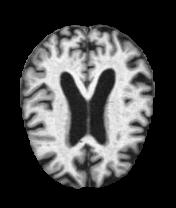

In [12]:
MildDemented=list(data_dir.glob('MildDemented/*'))
PIL.Image.open(str(MildDemented[0]))

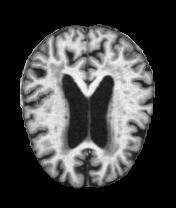

In [13]:
PIL.Image.open(MildDemented[1])

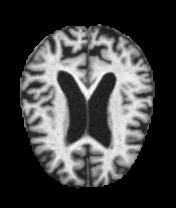

In [14]:
ModerateDemented=list(data_dir.glob('ModerateDemented/*'))
PIL.Image.open(str(ModerateDemented[0]))

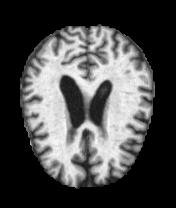

In [15]:
PIL.Image.open(str(ModerateDemented[1]))

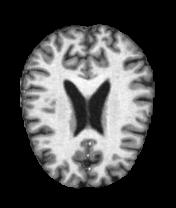

In [16]:
NonDemented=list(data_dir.glob('NonDemented/*'))
PIL.Image.open(str(NonDemented[0]))

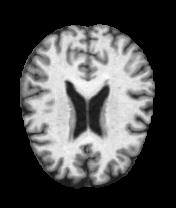

In [17]:
PIL.Image.open(str(NonDemented[1]))

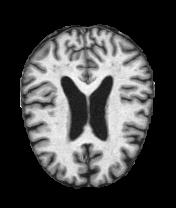

In [18]:
VeryMildDemented=list(data_dir.glob('VeryMildDemented/*'))
PIL.Image.open(str(VeryMildDemented[0]))

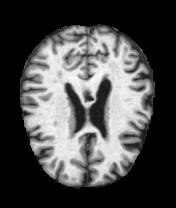

In [19]:
PIL.Image.open(str(VeryMildDemented[1]))

In [20]:
alzheimer_images_dict={
    'MildDemented':list(data_dir.glob('MildDemented/*')),
    'ModerateDemented':list(data_dir.glob('ModerateDemented/*')),
    'NonDemented':list(data_dir.glob('NonDemented/*')),
    'VeryMildDemented':list(data_dir.glob('VeryMildDemented/*'))
}

In [21]:
alzheimer_labels_dict={
    'MildDemented':0,
    'ModerateDemented':1,
    'NonDemented':2,
    'VeryMildDemented':3
}

In [22]:
alzheimer_images_dict['NonDemented'][:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (100).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (62).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (63).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (64).jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Alzheimer_s Dataset/NonDemented/26 (65).jpg')]

In [23]:
alzheimer_labels_dict['NonDemented']

2

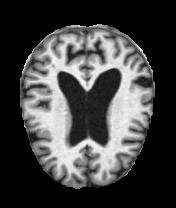

In [24]:
PIL.Image.open(str(alzheimer_images_dict['MildDemented'][2]))

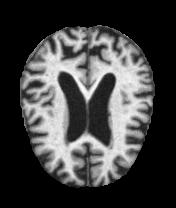

In [25]:
PIL.Image.open(str(alzheimer_images_dict['ModerateDemented'][2]))

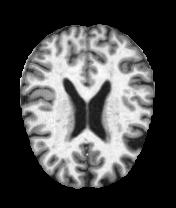

In [26]:
PIL.Image.open(str(alzheimer_images_dict['NonDemented'][2]))

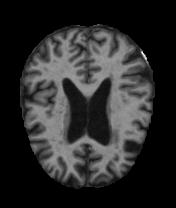

In [27]:
PIL.Image.open(str(alzheimer_images_dict['VeryMildDemented'][2]))

In [28]:
for alzheimer_name,images in alzheimer_images_dict.items():
    print(alzheimer_name)
    print(len(images))

MildDemented
896
ModerateDemented
64
NonDemented
3200
VeryMildDemented
2240


In [29]:
X,y=[],[]

for alzheimer_name,images in alzheimer_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(alzheimer_labels_dict[alzheimer_name])

In [30]:
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [31]:
y[0]

0

In [32]:
X=np.array(X)
y=np.array(y)

In [33]:
X.shape

(6400, 180, 180, 3)

In [34]:
y.shape

(6400,)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y)

In [36]:
X_train.shape

(5120, 180, 180, 3)

In [37]:
X_test.shape

(1280, 180, 180, 3)

In [38]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [39]:
X_train_scaled=X_train/255

In [40]:
X_test_scaled=X_test/255

In [41]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [42]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [43]:
num_classes=4
model=Sequential([
    data_augmentation,
    layers.Conv2D(70,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(55,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(40,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(25,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(200,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
160/160 [==============================] - 367s 2s/step - loss: 1.0566 - accuracy: 0.4883
Epoch 2/50
160/160 [==============================] - 340s 2s/step - loss: 0.9902 - accuracy: 0.5154
Epoch 3/50
160/160 [==============================] - 338s 2s/step - loss: 0.9347 - accuracy: 0.5479
Epoch 4/50
160/160 [==============================] - 339s 2s/step - loss: 0.9211 - accuracy: 0.5535
Epoch 5/50
160/160 [==============================] - 340s 2s/step - loss: 0.9068 - accuracy: 0.5578
Epoch 6/50
160/160 [==============================] - 336s 2s/step - loss: 0.8952 - accuracy: 0.5602
Epoch 7/50
160/160 [==============================] - 337s 2s/step - loss: 0.8898 - accuracy: 0.5621
Epoch 8/50
160/160 [==============================] - 337s 2s/step - loss: 0.8677 - accuracy: 0.5709
Epoch 9/50
160/160 [==============================] - 340s 2s/step - loss: 0.8666 - accuracy: 0.5730
Epoch 10/50
160/160 [==============================] - 338s 2s/step - loss: 0.8463 - accura

In [44]:
model.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 30s 514ms/step - loss: 0.4537 - accuracy: 0.8211


[0.4537222385406494, 0.821093738079071]

In [46]:
y_predicted=model.predict(X_test_scaled)

40/40 [==============================] - 21s 520ms/step


In [47]:
y_pred=[np.argmax(i) for i in y_predicted]
y_pred[:5]

[3, 2, 3, 3, 0]

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73       179
           1       0.79      0.85      0.81        13
           2       0.88      0.88      0.88       640
           3       0.89      0.69      0.78       448

    accuracy                           0.82      1280
   macro avg       0.79      0.84      0.80      1280
weighted avg       0.84      0.82      0.82      1280



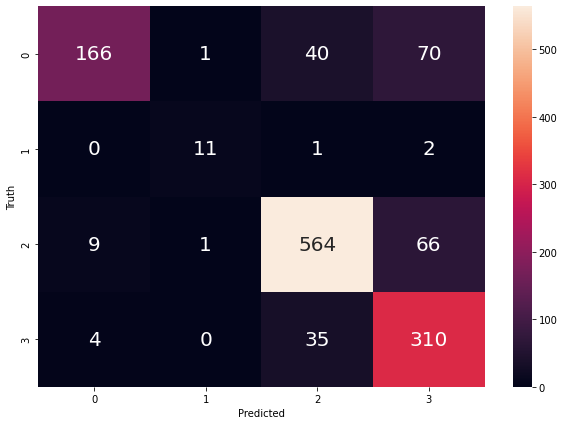

In [51]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,annot_kws={'size':20},fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()